In [1]:
#LogisticRegression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [3]:
iris = datasets.load_iris()


In [4]:
X = iris.data[:100, :2]  # We only take the first two features.
y = iris.target[:100]  # We take the first 100 instances, which only belong to the first two classes.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train) , len(X_test)

(80, 20)

In [6]:
model = LogisticRegression()

In [7]:
model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [8]:
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)

Coefficients:  [[ 2.88998626 -2.72779317]]
Intercept:  [-7.09121494]


In [18]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)
y_pred
y_prob #If the predicted probability for class 0 is greater than 0.5, the model chooses class 0; otherwise, it chooses class 1.

array([[0.05296719, 0.94703281],
       [0.07379633, 0.92620367],
       [0.22604741, 0.77395259],
       [0.80260571, 0.19739429],
       [0.9380746 , 0.0619254 ],
       [0.8357283 , 0.1642717 ],
       [0.9738481 , 0.0261519 ],
       [0.09474686, 0.90525314],
       [0.82893864, 0.17106136],
       [0.86984184, 0.13015816],
       [0.72788282, 0.27211718],
       [0.84229973, 0.15770027],
       [0.05215948, 0.94784052],
       [0.93419699, 0.06580301],
       [0.15297609, 0.84702391],
       [0.92138671, 0.07861329],
       [0.00722562, 0.99277438],
       [0.01649098, 0.98350902],
       [0.80260571, 0.19739429],
       [0.68130725, 0.31869275]])

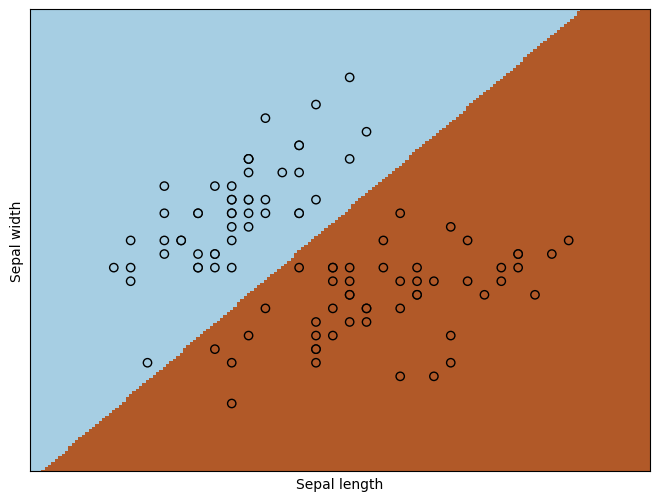

In [10]:


x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()



([], [])

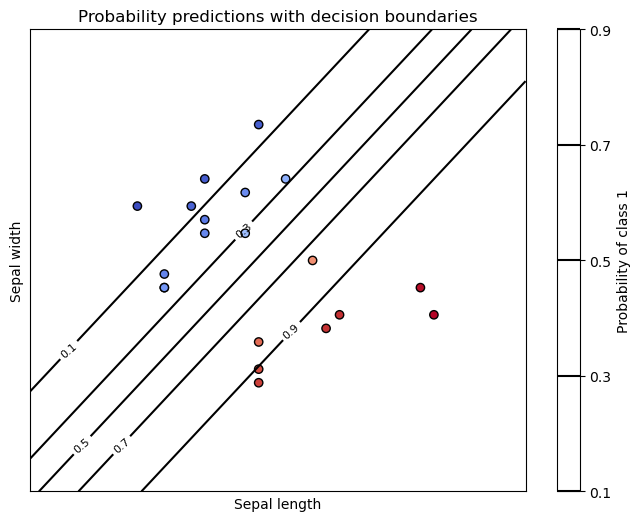

In [11]:
# Step 11 - Plotting the probabilities with contour lines
plt.figure(2, figsize=(8, 6))

# Probabilities of class 1 for each point in the grid
Z_prob = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z_prob = Z_prob.reshape(xx.shape)

# Scatter plot of the test data, colored by the probability of class 1
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_prob[:, 1], edgecolors='k', cmap=plt.cm.coolwarm)

# Contour plot for levels of probabilities
contour = plt.contour(xx, yy, Z_prob, levels=[0.1, 0.3, 0.5, 0.7, 0.9], colors='k')
plt.clabel(contour, inline=True, fontsize=8)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.colorbar(label='Probability of class 1')
plt.title('Probability predictions with decision boundaries')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())


In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 1.0


In [13]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)

Confusion Matrix: 
 [[12  0]
 [ 0  8]]
